In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
df=pd.read_csv(r"C:\Users\RITU CHOIUDHARY\Downloads\weight-height.csv")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [252]:
df['Height']=df['Height'].astype(int)
df['Weight']=df['Weight'].astype(int)   

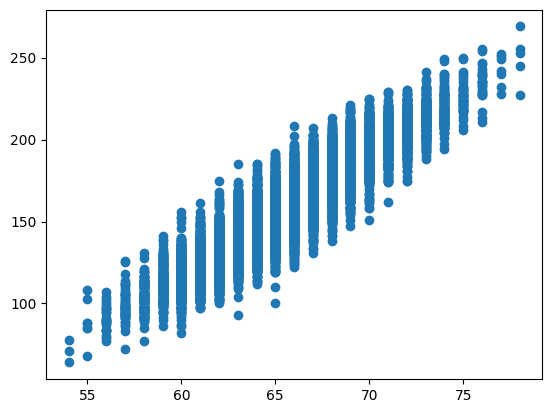

In [253]:
plt.plot(df['Height'],df['Weight'],'o')

In [254]:
X=df[['Height']]
y=df['Weight']

In [255]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 1), (3000, 1), (7000,), (3000,))

In [256]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [257]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

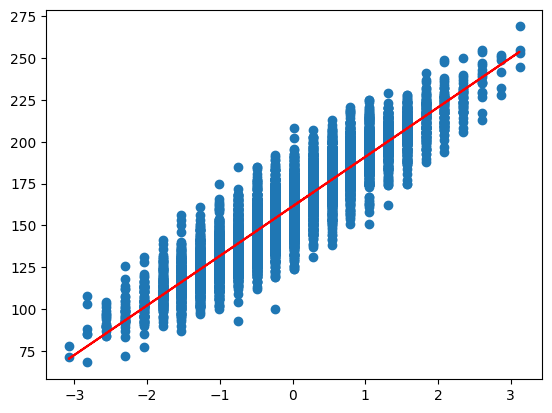

In [258]:
plt.plot(X_train_scaled,y_train,'o')
plt.plot(X_train_scaled,model.predict(X_train_scaled),'r')


In [259]:
model.coef_,model.intercept_

(array([29.61294016]), np.float64(161.38028571428578))

In [260]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
y_pred=model.predict(X_test_scaled)
mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred)


(158.56342115432113, 0.846250472701652, 10.154139773928106)

In [261]:
adjusted_r2=1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2

0.8461991886698647

In [262]:
model.predict(scaler.transform([[70]]))

c:\Users\RITU CHOIUDHARY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([192.62241743])

In [263]:
residuals=y_test-y_pred
residuals

9745   -28.358268
4492     4.336072
3439    -0.275247
6077    -4.746948
5372    -7.663928
          ...    
4965     4.988902
3459    -2.663928
6950   -10.705438
3619    12.724753
7047   -10.746948
Name: Weight, Length: 3000, dtype: float64

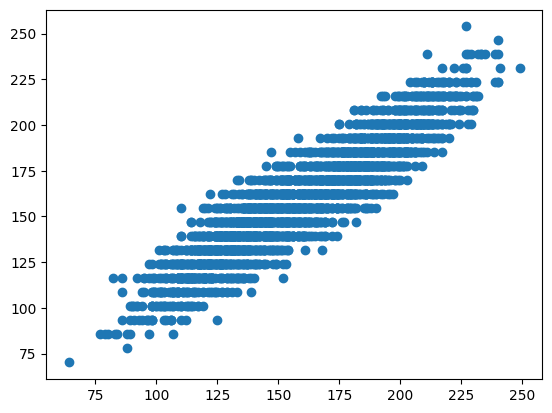

In [264]:
plt.scatter(y_test,y_pred)


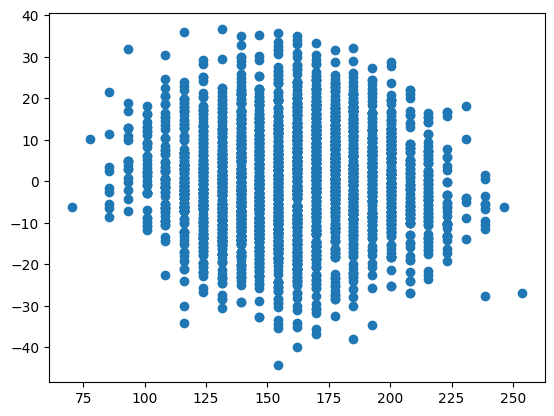

In [265]:
plt.scatter(y_pred,residuals)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import qqplot
from statsmodels.stats.stattools import durbin_watson


In [267]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
  Feature        VIF
0  Height  48.088584
1  Weight  48.088584


In [268]:
df.corr()

,Height,Weight
Height,1.000000,0.921917
Weight,0.921917,1.000000


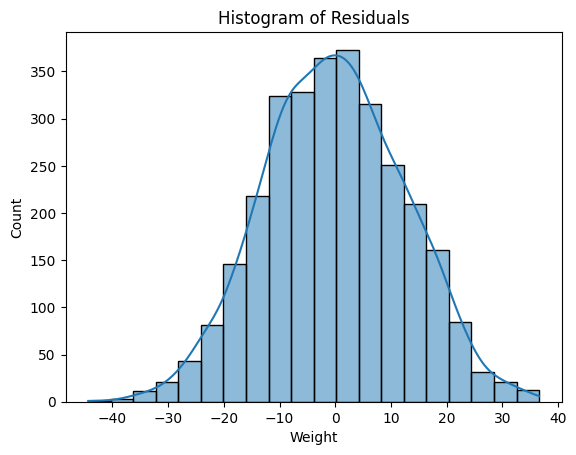

In [269]:
import seaborn as sns
sns.histplot(residuals, kde=True, bins=20)
plt.title("Histogram of Residuals")
plt.show()


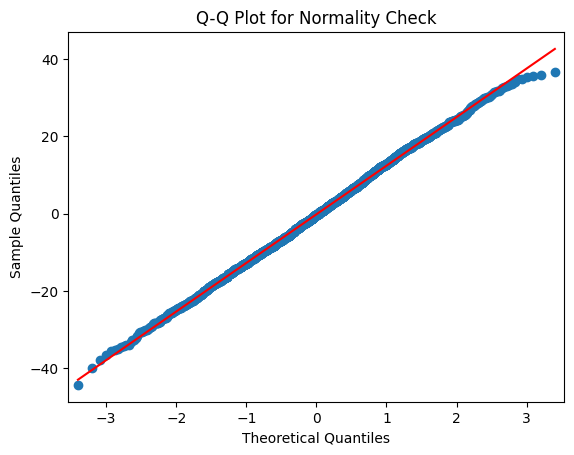

In [270]:
qqplot(residuals, line='s')
plt.title("Q-Q Plot for Normality Check")
plt.show()


In [271]:
import scipy.stats as stats
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test p-value: 0.05725338081355228


In [272]:
df2=pd.read_csv(r"C:\Users\RITU CHOIUDHARY\Downloads\Algerian_forest_fires_dataset.csv")
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [274]:
df2.columns=df2.columns.str.strip()

In [275]:
df2['Classes']=np.where(df2['Classes'].str.contains('not fire'),0,1)

In [279]:
df2[df2.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [284]:
df2.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,0,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,0,0.0
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,1,1.0
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1.0


In [283]:
df2.loc[:122,"Region"]=0
df2.loc[122:,"Region"]=1

In [285]:
df2.drop([122,123,124],inplace=True)

In [286]:
df2[['day','month','year','Temperature','RH','Ws']]=df2[['day','month','year','Temperature','RH','Ws']].astype(int)

In [287]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(1), int64(7), object(7)
memory usage: 30.5+ KB


In [294]:
df2['DC']=np.where(df2['DC']=='14.6 9',14.69,df2['DC'])
df2.drop(168,inplace=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,0,1.0


In [295]:
obj_list=df2.select_dtypes(include='object').columns
obj_list

Index(['FWI'], dtype='object')

In [296]:
for i in obj_list:
    if i!='Classes':
        df2[i]=df2[i].astype(float)

In [297]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 30.4 KB


In [298]:
df2['Region']=df2['Region'].astype(int)

In [300]:
df2.drop(['day','month','year'],axis=1,inplace=True)

In [301]:
df2

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [308]:


# Assuming 'df' is your DataFrame containing the data
# Calculate the correlation matrix
corr_matrix = df2.corr().abs()

# Create an upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Identify columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]


print(f"Columns removed: {to_drop}")



Columns removed: ['DC', 'BUI', 'FWI']


In [312]:
X_train,X_test,y_train,y_test=train_test_split(df2.drop(['FWI','DC','BUI'],axis=1),df2['FWI'],test_size=0.3,random_state=41)

In [314]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [317]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)


LinearRegression()

In [318]:
mean_absolute_error(y_test,model.predict(X_test_scaled)),r2_score(y_test,model.predict(X_test_scaled))

(0.5475583009484176, 0.9817767477775875)

In [319]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=0.01)
model.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

In [320]:
mean_absolute_error(y_test,model.predict(X_test_scaled)),r2_score(y_test,model.predict(X_test_scaled))

(0.5403693619069128, 0.9818559139438651)

In [321]:
from sklearn.linear_model import LassoCV, ElasticNetCV

# LassoCV
lasso_cv_model = LassoCV(cv=5, random_state=41)
lasso_cv_model.fit(X_train_scaled, y_train)

# ElasticNetCV
elasticnet_cv_model = ElasticNetCV(cv=5, random_state=41)
elasticnet_cv_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso_cv = lasso_cv_model.predict(X_test_scaled)
y_pred_elasticnet_cv = elasticnet_cv_model.predict(X_test_scaled)

# Evaluation
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

mae_elasticnet_cv = mean_absolute_error(y_test, y_pred_elasticnet_cv)
r2_elasticnet_cv = r2_score(y_test, y_pred_elasticnet_cv)

print(f"LassoCV MAE: {mae_lasso_cv}, R2: {r2_lasso_cv}")
print(f"ElasticNetCV MAE: {mae_elasticnet_cv}, R2: {r2_elasticnet_cv}")

LassoCV MAE: 0.5526186965978443, R2: 0.9816292430365029
ElasticNetCV MAE: 0.5964690430039495, R2: 0.9799833644627047


In [322]:
import os
os.getcwd()

'c:\\Users\\RITU CHOIUDHARY\\Downloads\\FastAPI-The-Complete-Course-main\\FastAPI-The-Complete-Course-main\\FastAPI'